In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1

In [2]:
mu = 6
n_iid = 200
n_simulations = 2000

In [3]:
r = poisson.rvs(mu, size=n_iid)
print(r)

[ 9  5  6  7  9  7  3 10  3  5  6  2  5  5  5  9  7  7  4 12  7  2  5  8
  3  5 10  4  4  5  4 11  5  8  4  1  6  4  2  6  3  3  5  6  5  5  9  7
  3  4  6  6  9 10  7  8  4  6  6  9  5  5  4  4  2  6  5  7  4  6  9  6
  5  3  8  5  7 11  5  5  4  8  2  4  5  6  7  8  7  5  7  4  6  7  5 10
  7  5  5  8 10  6  5  7  5  3  5  6  8  3  5  8  5  3  5  5  8  9  7  6
  3  8  7  6 10  6  6  8  3 11  3  8  5  5  7  5  5  8  2  6  6  5  5  8
  6  7  3  7 10  4  6  1  4  3  3  3  6  8  3 10  6  7  6  3  8  0  7  4
  6  2  5  6  7  6 10  9  2  4  5  6 10  4  5  6  8  7  4  3  9  9 12  7
  3  5  7  8  6  3  5  9]


In [4]:
array_of_avgs = []

In [5]:
for i in range(n_simulations):
    r = poisson.rvs(mu, size=n_iid)
    array_of_avgs.append(r.mean())

In [6]:
n_bins = math.ceil(math.log2(n_simulations)) + 1

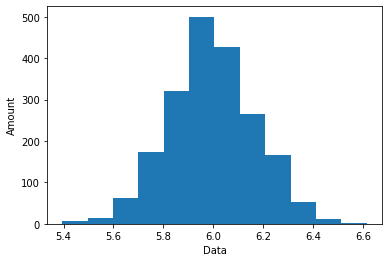

In [7]:
plt.hist(array_of_avgs,  bins=n_bins) 
plt.ylabel('Amount')
plt.xlabel('Data');

#### Нормальное распределение - Central Limit Theorem

In [8]:
array_of_avgs = np.array(array_of_avgs)

In [9]:
mean_ = array_of_avgs.mean() #среднее

In [10]:
variance = np.var(array_of_avgs) #дисперсия

In [11]:
sd = math.sqrt(variance) #стандартное отклонение

In [12]:
print('mean = ', round(mean_,3),'\nvariance = ',round(variance,3), '\nstandart deviation =', round(sd,3))

mean =  5.995 
variance =  0.029 
standart deviation = 0.172


 Если для экспоненциального распределения с параметром lambda = 0.5 провести подобные действия (вычисление среднего от 200 iid случайных величин в 2000 симуляциях), то мы тоже получим нормально распределенную величину, но со средним близким к 1/0.5 = 2

# Задание 3

In [13]:
df = pd.read_csv('Analytical_Test.csv', delimiter = ';')

In [14]:
df.columns

Index(['userid', 'day', 'time', 'revenue', 'offerid', 'promotionid', 'price'], dtype='object')

In [15]:
df.head(10)

,userid,day,time,revenue,offerid,promotionid,price
0,81311083902161592,2019-10-17,2019-10-17 12:28:42.9441 UTC,"8,499019193",NaN,NaN,"9,96"
1,81311152617854404,2019-10-17,2019-10-17 06:19:13.5882 UTC,"6,651215354",NaN,NaN,"15,78"
2,81311083900752467,2019-10-17,2019-10-17 12:57:09.2295 UTC,"24,36723487",NaN,NaN,"20,1"
3,81311083897991208,2019-10-17,2019-10-17 20:58:32.4207 UTC,"34,35885787",3245.0,1074.0,"34,99"
4,81311083901723932,2019-10-17,2019-10-17 22:22:24.087 UTC,"10,77239388",NaN,NaN,"9,34"
5,81311083902488594,2019-10-17,2019-10-17 21:22:48.4106 UTC,"27,20474128",17386.0,1074.0,"22,49"
6,81311083902242405,2019-10-17,2019-10-17 01:58:46.6134 UTC,"48,73446974",17390.0,1074.0,"39,99"
7,81311083900752467,2019-10-17,2019-10-17 12:57:23.1374 UTC,"12,18361744",NaN,NaN,"10,05"
8,81311083899299583,2019-10-17,2019-10-17 19:57:05.1818 UTC,"18,89439846",NaN,NaN,"19,55"
9,81311083902170090,2019-10-17,2019-10-17 22:32:50.0264 UTC,"4,105516997",NaN,NaN,"4,98"


In [16]:
df['revenue'] = pd.to_numeric(df['revenue'].str.replace(',', '.', regex=False))
df['price'] = pd.to_numeric(df['price'].str.replace(',', '.', regex=False))
df['day'] = pd.to_datetime(df['day'])

In [17]:
def metrics_monitization(df, promotionid, segment = None):
    
    promotion = df[df['promotionid']==promotionid]
    if segment:
        revenue_promotion = promotion['revenue'].sum()
        promotion = promotion[df['offerid']==segment]
    
    depositors = promotion['userid'].nunique() # количество юзеров сделавших оплату
    deposits =  promotion['revenue'].count() # количество оплат
    
    conversion_rate = depositors/275000 # Конверсия
    revenue = promotion['revenue'].sum()  # доход
    arppu = revenue/depositors # доход на платежного юзера
    arpu = revenue/275000 # доход на юзера
    avg_per_user_df = promotion[['userid', 'revenue']].groupby(['userid']).agg('mean')
    x = np.array(avg_per_user_df['revenue'].sort_values(ascending=True))
    avg_per_user_deposits = np.median(x) # среднее значение оплаты юзером
    if segment:
        perc_of_revenue =  revenue/revenue_promotion # процент от дохода по сегменту
    else:
         perc_of_revenue = None
    return (promotion, depositors, deposits,conversion_rate, revenue, arppu, arpu,  avg_per_user_deposits, perc_of_revenue)

# Promotion 4137

### In-game discount

In [18]:
promotion_4137, depositors_4137, deposits_4137,conversion_rate_4137, revenue_4137, arppu_4137, arpu_4137, \
avg_per_user_deposits_4137, _ = metrics_monitization(df, 4137)

In [19]:
promotion_4137[['offerid', 'promotionid', 'price']].groupby(['offerid', 'promotionid', 'price']).size()

offerid  promotionid  price
18784.0  4137.0       99.99      61
18785.0  4137.0       49.99     268
18786.0  4137.0       19.99     338
18787.0  4137.0       79.99     388
18788.0  4137.0       9.99     1360
18789.0  4137.0       5.99      474
dtype: int64

### Метрики для сегментов в скидке 4137

In [20]:
segments_4137 = promotion_4137['offerid'].unique()

In [21]:
depositors_segments_4137 = {}
deposits_segments_4137 = {}
conversion_rate_segments_4137 = {}
revenue_segments_4137 = {}
arppu_segments_4137 = {}
arpu_segments_4137 = {}
avg_per_user_deposits_segement_4137 = {}
perc_of_revenue_segments_4137 = {}
for segment in segments_4137:
    _, \
    depositors_segments_4137[segment],\
    deposits_segments_4137[segment], \
    conversion_rate_segments_4137[segment], \
    revenue_segments_4137[segment], \
    arppu_segments_4137[segment], \
    arpu_segments_4137[segment], \
    avg_per_user_deposits_segement_4137[segment],\
    perc_of_revenue_segments_4137[segment] =  metrics_monitization(df, 4137, segment)
    

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [58]:
df_segments_4137 = pd.DataFrame({
    'depositors':pd.Series(depositors_segments_4137),\
    'deposits':pd.Series(deposits_segments_4137), \
    'conversion_rate':pd.Series(conversion_rate_segments_4137).round(3), \
    'revenue_segments':pd.Series(revenue_segments_4137).round(3), \
    'arppu_segments':pd.Series(arppu_segments_4137).round(3), \
    'arpu_segments':pd.Series(arpu_segments_4137).round(3), \
    'avg_per_user_deposits':pd.Series(avg_per_user_deposits_segement_4137).round(3),\
    'perc_of_revenue': pd.Series(perc_of_revenue_segments_4137).round(3)
})

In [59]:
df_segments_4137.index.name = 'segments'

In [60]:
df_segments_4137.sort_index()

,depositors,deposits,conversion_rate,revenue_segments,arppu_segments,arpu_segments,avg_per_user_deposits,perc_of_revenue
segments,,,,,,,,
18784.0,29,61,0.000,6711.312,231.425,0.024,97.695,0.091
18785.0,186,268,0.001,13833.294,74.373,0.050,48.682,0.187
18786.0,221,338,0.001,5754.932,26.040,0.021,19.304,0.078
18787.0,210,388,0.001,33636.607,160.174,0.122,77.895,0.454
18788.0,835,1360,0.003,11424.124,13.682,0.042,9.600,0.154
18789.0,260,474,0.001,2786.020,10.715,0.010,5.842,0.038


## Метрики скидки 4137

In [53]:
print('depositors = ',depositors_4137, '\ndeposits = ',deposits_4137,'\nconversion_rate = ',round(conversion_rate_4137,3), 
      '\nrevenue = ',round(revenue_4137,3), '\narppu = ', round(arppu_4137,3), '\narpu = ', round(arpu_4137,3), 
      '\navg per user deposits =',round(avg_per_user_deposits_4137,3))

depositors =  1741 
deposits =  2889 
conversion_rate =  0.006 
revenue =  74146.29 
arppu =  42.588 
arpu =  0.27 
avg per user deposits = 9.769


# Promotion 4138

In [25]:
promotion_4138, depositors_4138, deposits_4138,conversion_rate_4138, revenue_4138, arppu_4138, arpu_4138, \
avg_per_user_deposits_4138,_ = metrics_monitization(df, 4138)

In [28]:
promotion_4138[['offerid', 'promotionid', 'price']].groupby(['offerid', 'promotionid', 'price']).size()

offerid  promotionid  price
18790.0  4138.0       99.99     32
18791.0  4138.0       49.99    169
18792.0  4138.0       19.99    216
18793.0  4138.0       79.99    227
18794.0  4138.0       9.99     814
18795.0  4138.0       5.99     264
dtype: int64

## Метрики для сегментов в скидке 4138

In [30]:
segments_4138 = promotion_4138['offerid'].unique()

In [33]:
depositors_segments_4138 = {}
deposits_segments_4138 = {}
conversion_rate_segments_4138 = {}
revenue_segments_4138 = {}
arppu_segments_4138 = {}
arpu_segments_4138 = {}
avg_per_user_deposits_segement_4138 = {}
perc_of_revenue_segments_4138 = {}
for segment in segments_4138:
    _, \
    depositors_segments_4138[segment],\
    deposits_segments_4138[segment], \
    conversion_rate_segments_4138[segment], \
    revenue_segments_4138[segment], \
    arppu_segments_4138[segment], \
    arpu_segments_4138[segment], \
    avg_per_user_deposits_segement_4138[segment],\
    perc_of_revenue_segments_4138[segment] =  metrics_monitization(df, 4138, segment)

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [61]:
df_segments_4138 = pd.DataFrame({
    'depositors':pd.Series(depositors_segments_4138),\
    'deposits':pd.Series(deposits_segments_4138), \
    'conversion_rate':pd.Series(conversion_rate_segments_4138).round(3), \
    'revenue_segments':pd.Series(revenue_segments_4138).round(3), \
    'arppu_segments':pd.Series(arppu_segments_4138).round(3), \
    'arpu_segments':pd.Series(arpu_segments_4138).round(3), \
    'avg_per_user_deposits':pd.Series(avg_per_user_deposits_segement_4138).round(3),\
    'perc_of_revenue': pd.Series(perc_of_revenue_segments_4138).round(3)
})


In [62]:
df_segments_4138.index.name = 'segments'

In [63]:
df_segments_4138.sort_index()

,depositors,deposits,conversion_rate,revenue_segments,arppu_segments,arpu_segments,avg_per_user_deposits,perc_of_revenue
segments,,,,,,,,
18790.0,16,32,0.000,3314.395,207.150,0.012,100.171,0.077
18791.0,119,169,0.000,8493.842,71.377,0.031,48.682,0.198
18792.0,137,216,0.000,3837.376,28.010,0.014,19.459,0.089
18793.0,126,227,0.000,19242.272,152.716,0.070,77.895,0.449
18794.0,491,814,0.002,6556.268,13.353,0.024,9.652,0.153
18795.0,152,264,0.001,1454.331,9.568,0.005,5.791,0.034


## Метрики скидки 4138

In [64]:
print('depositors = ',depositors_4138, '\ndeposits = ',deposits_4138,'\nconversion_rate = ',round(conversion_rate_4138,3), 
      '\nrevenue = ',round(revenue_4138,3), '\narppu = ', round(arppu_4138,3), '\narpu = ', round(arpu_4138,3), \
      '\navg per user deposits =', round(avg_per_user_deposits_4138,3))

depositors =  1041 
deposits =  1722 
conversion_rate =  0.004 
revenue =  42898.484 
arppu =  41.209 
arpu =  0.156 
avg per user deposits = 9.823


In [36]:
"""
Анализ тренда дохода, количества юзеров, оплат
"""
df2 = df[['day','userid', 'revenue','promotionid']][(df['day']>='2019-11-12') & (df['day']<'2019-12-30')]

### Доход общий, по скидкам 4137, 4138 и без них с '2019-11-12' по '2019-12-30'

C:\Users\Natalia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


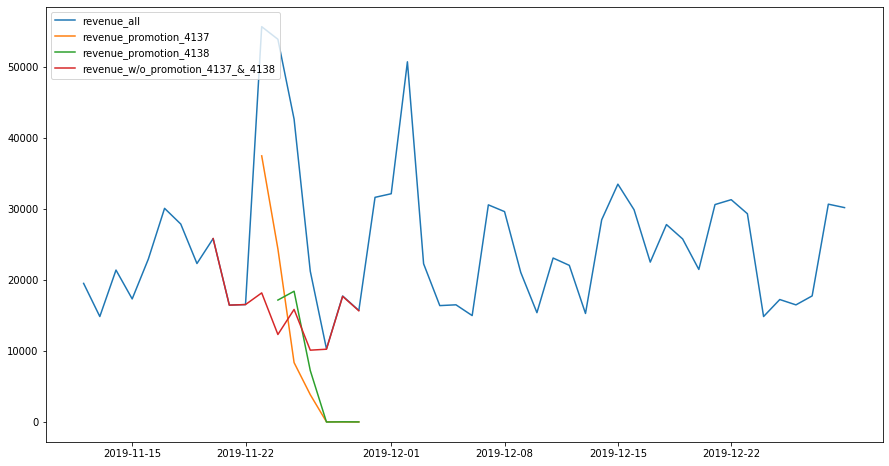

In [37]:
plt.figure(figsize=(15,8))

line1, = plt.plot(df2[['day', 'revenue']].groupby(['day']).sum(),  label="revenue_all")
line2, =plt.plot(df2[['day', 'revenue']][df2['promotionid']==4137].groupby(['day']).sum(),  label="revenue_promotion_4137")
line3, =plt.plot(df2[['day', 'revenue']][df2['promotionid']==4138].groupby(['day']).sum(), label="revenue_promotion_4138")
line4, =plt.plot(df2[['day', 'revenue']][(df2['promotionid']!=4138) &(df2['promotionid']!=4137)&(df['day']>='2019-11-20') &\
                                 (df['day']<'2019-11-30')].groupby(['day']).sum(),label="revenue_w/o_promotion_4137_&_4138")

plt.legend(handles=[line1,line2,line3,line4],loc='upper left')
plt.show()

### Количество юзеров сделавших оплату - общее, по скидкам 4137, 4138 и без них с '2019-11-12' по '2019-12-30'

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


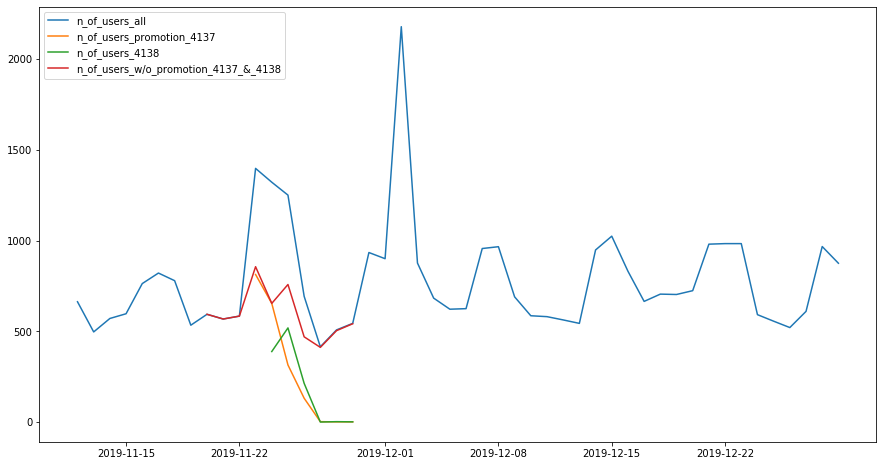

In [38]:
plt.figure(figsize=(15,8))
line1, =plt.plot(df2[['day', 'userid']].groupby(['day']).agg({"userid": "nunique"}), label="n_of_users_all")
line2, =plt.plot(df2[['day', 'userid']][df2['promotionid']==4137].groupby(['day']).agg({"userid": "nunique"}),  \
                 label="n_of_users_promotion_4137")
line3, =plt.plot(df2[['day', 'userid']][df2['promotionid']==4138].groupby(['day']).agg({"userid": "nunique"}), \
                 label="n_of_users_4138")
line4, =plt.plot(df2[['day', 'userid']][(df2['promotionid']!=4138) &(df2['promotionid']!=4137)&(df['day']>='2019-11-20') &\
                                 (df['day']<'2019-11-30')].groupby(['day']).agg({"userid": "nunique"}),\
                 label="n_of_users_w/o_promotion_4137_&_4138")
plt.legend(handles=[line1,line2,line3,line4],loc='upper left')
plt.show()

### Количество оплат общее, по скидкам 4137, 4138 и без них с '2019-11-12' по '2019-12-30'

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


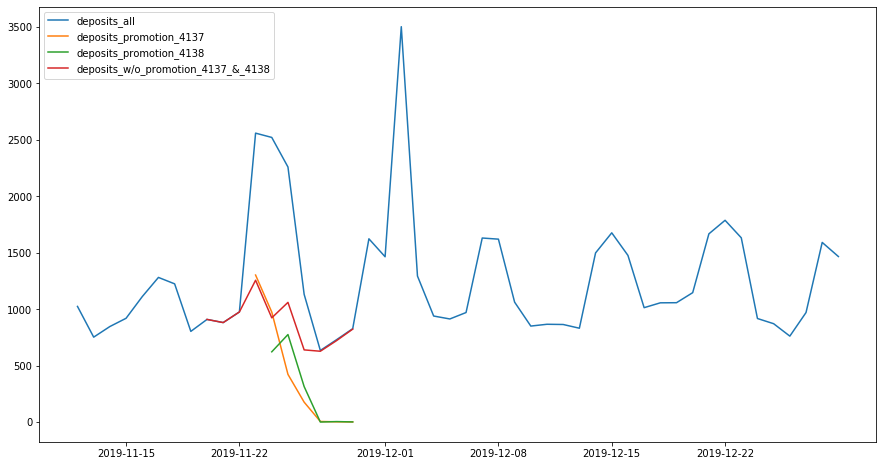

In [39]:
plt.figure(figsize=(15,8))

line1, = plt.plot(df2[['day', 'revenue']].groupby(['day']).count(),  label="deposits_all")
line2, =plt.plot(df2[['day', 'revenue']][df2['promotionid']==4137].groupby(['day']).count(),  label="deposits_promotion_4137")
line3, =plt.plot(df2[['day', 'revenue']][df2['promotionid']==4138].groupby(['day']).count(), label="deposits_promotion_4138")
line4, =plt.plot(df2[['day', 'revenue']][(df2['promotionid']!=4138) &(df2['promotionid']!=4137)&(df['day']>='2019-11-20') &\
                                 (df['day']<'2019-11-30')].groupby(['day']).count(),label="deposits_w/o_promotion_4137_&_4138")
plt.legend(handles=[line1,line2,line3,line4],loc='upper left')
plt.show()

Вывод: Promotions 4137 и 4138 увеличили практически в 2 раза сумму ревенью и количество оплат в первые 2 дня скидок, также увеличилось количество платежных юзеров. В дальнейшем есть всплеск количества покупок и общей суммы дохода 2го декабря, что также связано с другими скидками в тот период. 
Для скидки 4137 было больше покупок юзерами чем для скидки 4138, а также ревенью первой почти в 1.5 раза больше чем последней скидки.

# Задание 2

In [40]:
from IPython.display import HTML, display
import tabulate

In [41]:
table = [["Points","Silver","Sapphire","Pikeman", "Dragon"],
         [100,1000,200,100,1],
         [50000,10000,1000,500,5],
         ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Points,Silver,Sapphire,Pikeman,Dragon
100,1000,200,100,1
50000,10000,1000,500,5


С увелечением очков у игрока появляются различные бонусы, которые помогают быстрее добывать ресурсы, увеличивает мощь юнитов.  В процессе приобретения 100 очков пользователь еще является новичком, а набрать 50 000 очков подвластно уже профессиональному пользователю с несколькими месяцами и более опыта прохождения данной игры. Поэтому бонусы в начале должны быть мотивирующие. Дальше чем больше очков тем больше бонусов, но не прямо-пропорционально увелечению количество очков. Чем больше очков тем меньше прирост бонусов с целью оставить игрока подольше в игре, чтоб была цель что-то накопить и не быть всевластным. \
Не увидела пока в игре ценность серебра, хотя прошла все квесты новичка. Поэтому с расчета примерной той же ценности что и золото выставила такую сумму. 


При 100 очках награды \
Pikeman в случаи победы игрока принесет 100 * 40 = 4000 силы или 4 очка (правда есть и другие бонусы, которые увеличивают мощность воинов, поэтому все рассчеты приблизительны). \
Дракон 1680 = 1,5 очка \
И за 200 сапфиров можно восстановить часть войска до 20-30 юнитов взависимости от юнита \
За 1000 серебрянников можно построить или обновить несколько зданий или прикупить некоторых воинов

При 50 000 очках \
Pikeman в случаи победы игрока принесет 500 * 40 = 20 000 силы или 20 очков. \
Дракон 1680*5 : 8 очков \
И за 1000 сапфиров можно восстановить юниты (пока не все юниты доступны и их ценность не известна) или купить около 75 очков и т.д \
За 10000 серебрянников можно построить или обновить 10ки зданий или прикупить некоторых воинов